In [136]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import random
random.seed(10)
import data_pre as data_pre

In [137]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [138]:
data = pd.read_csv("C:/Santhosh/AIML/Github/Machine-Learning/Costa Rican Household Poverty Level Prediction/data/train.csv")

In [139]:
del_cols = ['idhogar', 'Id','dependency','tamhog','r4t3', 'tamviv', 'r4h1', 'hogar_total','r4h2', 'r4h3', 'r4m1', 'r4m2','r4m3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq']

In [140]:
data_pre.drop_columns(data,del_cols)
data_pre.replce_na(data)
data_pre.get_cat_cols(data)
data_pre.encode_data(data)
train, test = data_pre.train_test_split(data)

In [141]:
X_train = train.drop(['Target'], axis =1)
Y_train = train['Target']
X_test = test.drop(['Target'], axis =1)
Y_test = test['Target']

In [142]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [143]:
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.metrics import f1
model = keras.Sequential()

In [144]:
model.add(layers.Dense(117, input_shape=(117,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(15))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5))
model.add(layers.Activation('softmax')) 

In [145]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
history = model.fit(X_train, Y_train, epochs=100,
           verbose=2,
           validation_data=(X_test, Y_test))

Train on 7646 samples, validate on 1911 samples
Epoch 1/100
7646/7646 - 1s - loss: 152.7649 - acc: 0.5909 - val_loss: 1.1346 - val_acc: 0.6374
Epoch 2/100
7646/7646 - 1s - loss: 9.5641 - acc: 0.6341 - val_loss: 1.0624 - val_acc: 0.6504
Epoch 3/100
7646/7646 - 1s - loss: 2.4902 - acc: 0.6465 - val_loss: 1.0335 - val_acc: 0.6473
Epoch 4/100
7646/7646 - 1s - loss: 2.2543 - acc: 0.6465 - val_loss: 0.9982 - val_acc: 0.6520
Epoch 5/100
7646/7646 - 0s - loss: 1.5521 - acc: 0.6579 - val_loss: 0.9738 - val_acc: 0.6494
Epoch 6/100
7646/7646 - 0s - loss: 1.5613 - acc: 0.6613 - val_loss: 0.9597 - val_acc: 0.6588
Epoch 7/100
7646/7646 - 0s - loss: 1.4226 - acc: 0.6562 - val_loss: 0.9368 - val_acc: 0.6567
Epoch 8/100
7646/7646 - 0s - loss: 1.0170 - acc: 0.6588 - val_loss: 0.9294 - val_acc: 0.6672
Epoch 9/100
7646/7646 - 0s - loss: 1.3408 - acc: 0.6653 - val_loss: 0.9156 - val_acc: 0.6635
Epoch 10/100
7646/7646 - 0s - loss: 1.0141 - acc: 0.6721 - val_loss: 0.9210 - val_acc: 0.6620
Epoch 11/100
7646/7

Epoch 88/100
7646/7646 - 0s - loss: 0.4302 - acc: 0.8790 - val_loss: 0.7620 - val_acc: 0.7943
Epoch 89/100
7646/7646 - 1s - loss: 0.4550 - acc: 0.8824 - val_loss: 0.9211 - val_acc: 0.7813
Epoch 90/100
7646/7646 - 0s - loss: 0.3440 - acc: 0.8844 - val_loss: 0.7965 - val_acc: 0.8001
Epoch 91/100
7646/7646 - 0s - loss: 0.3938 - acc: 0.8857 - val_loss: 0.8135 - val_acc: 0.7975
Epoch 92/100
7646/7646 - 0s - loss: 0.3587 - acc: 0.8785 - val_loss: 0.8317 - val_acc: 0.7954
Epoch 93/100
7646/7646 - 0s - loss: 0.3406 - acc: 0.8883 - val_loss: 0.8658 - val_acc: 0.7975
Epoch 94/100
7646/7646 - 0s - loss: 0.3508 - acc: 0.8857 - val_loss: 0.8524 - val_acc: 0.7996
Epoch 95/100
7646/7646 - 0s - loss: 0.3552 - acc: 0.8797 - val_loss: 0.8353 - val_acc: 0.7980
Epoch 96/100
7646/7646 - 0s - loss: 0.3443 - acc: 0.8843 - val_loss: 0.8229 - val_acc: 0.7923
Epoch 97/100
7646/7646 - 0s - loss: 0.3382 - acc: 0.8888 - val_loss: 0.8990 - val_acc: 0.7917
Epoch 98/100
7646/7646 - 0s - loss: 0.3470 - acc: 0.8856 - v

In [147]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,acc,val_loss,val_acc
95,0.344348,0.884253,0.822866,0.792255
96,0.338244,0.888831,0.898992,0.791732
97,0.347002,0.885561,0.886041,0.795395
98,0.375744,0.888569,0.866846,0.784929
99,0.341581,0.888046,0.902790,0.792779


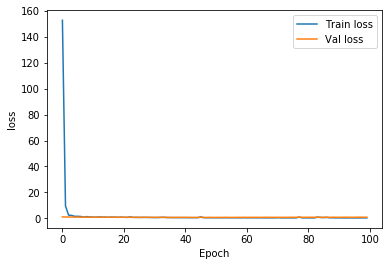

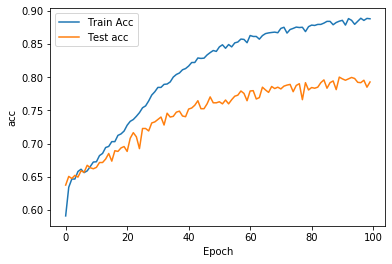

In [148]:
 def plot_history(history): 
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('loss')
        plt.plot(hist['epoch'], hist['loss'], label='Train loss')
        plt.plot(hist['epoch'], hist['val_loss'], label = 'Val loss')
        plt.legend()

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('acc')
        plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
        plt.plot(hist['epoch'], hist['val_acc'],label = 'Test acc')
        plt.legend()
        plt.show()


plot_history(history)

In [149]:
score = model.evaluate(X_test, Y_test, batch_size=128)

1911/1911 [==============================] - 0s 29us/sample - loss: 0.9028 - acc: 0.7928
